## Практична робота 2
### Бінарна класифікація

### Виконав студент групи ШІДМ-51 Тертишний В.Ю.

### Виконані зміни:
- Замість Sequential моделі використовуємо функціональне API Keras 
- Додавання прихованого шару позитивно впливає на точність моделі
- Згідно з матрицею помилок, бінарна класифікація оновленої моделі є більш точною (файл heart.csv)
- Додано інший набір даних про рак грудної залози
- Використано підклас Model для створення моделі


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn
import pandas as pd
import keras
from keras.models import Sequential   # importing Sequential model
from keras.layers import Dense
from keras.models import Model
from keras.layers import Input
import tensorflow as tf
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_breast_cancer
from keras.models import Model


In [39]:
data = load_breast_cancer()

In [40]:
df = pd.DataFrame(data.data, columns=data.feature_names)
# df = pd.read_csv("heart.csv")
df['output'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,output
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [41]:
target_column = "output"
numerical_column = df.columns.drop(target_column)

In [42]:
scaler = MinMaxScaler()

In [43]:
output_rows = df[target_column]

In [44]:
df.drop(target_column,axis=1,inplace=True)

In [45]:
scaler.fit(df)
t_df = scaler.transform(df)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(t_df, output_rows, test_size=0.25, random_state= 0)

In [47]:
print('X_train:',np.shape(X_train))
print('y_train:',np.shape(y_train))
print('X_test:',np.shape(X_test))
print('y_test:',np.shape(y_test))


X_train: (426, 30)
y_train: (426,)
X_test: (143, 30)
y_test: (143,)


Замість Sequential моделі використовуємо функціональний API

Замість послідовного додавання шарів через model.add(), ми:
Визначаємо вхідний шар через Input()
З'єднуємо шари послідовно, передаючи вихід попереднього шару як вхід наступного
Створюємо модель, вказуючи вхідний та вихідний шари


In [48]:
# Створюємо підклас Model
class HeartDiseaseModel(Model):
    def __init__(self):
        super(HeartDiseaseModel, self).__init__()
        self.dense1 = Dense(16, activation='relu')
        self.dense2 = Dense(32, activation='relu')
        self.output_layer = Dense(1, activation='sigmoid')
        
    def call(self, inputs):
        x = self.dense1(inputs)
        x = self.dense2(x)
        return self.output_layer(x)

In [49]:
basic_model = HeartDiseaseModel()

In [50]:
adam = keras.optimizers.Adam(learning_rate=0.001)
basic_model.compile(loss = 'binary_crossentropy', optimizer = adam, metrics=["accuracy"])

In [51]:
basic_model.build(input_shape=(None, 13))
basic_model.fit(X_train, y_train, epochs=100)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/layer.py:391: UserWarning: `build()` was called on layer 'heart_disease_model', however the layer does not have a `build()` method implemented and it looks like it has unbuilt state. This will cause the layer to be marked as built, despite not being actually built, which may cause failures down the line. Make sure to implement a proper `build()` method.
  warnings.warn(


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4923 - loss: 0.6847  
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8649 - loss: 0.6682 
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8494 - loss: 0.6505 
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8391 - loss: 0.6277 
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8785 - loss: 0.5950 
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8979 - loss: 0.5551 
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8969 - loss: 0.5003 
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9093 - loss: 0.4485 
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8984 - loss: 0.3879 
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9107 - loss: 0.3461 
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9269 - loss: 0.3000 
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

In [52]:
loss_and_metrics = basic_model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9801 - loss: 0.0789  
[0.11536777019500732, 0.9650349617004395]
Loss =  0.11536777019500732
Accuracy =  0.9650349617004395


In [53]:
predicted = basic_model.predict(X_test)
predicted = tf.squeeze(predicted)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [54]:
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_test)

## Додавання прихованого шару позитивно впливає на точність моделі
### Згідно з матрицею помилок, бінарна класифікація оновленої моделі є більш точною (файл heart.csv)
### (24 TN 9 FP 3 FN 40 TP) проти 
### (22 TN 11 FP 4 FN 39 TP) для даних


Accuracy: 0.965
Precision: 0.967
Recall: 0.978


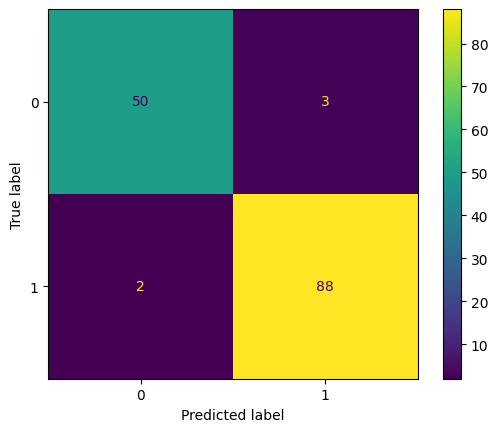

In [55]:
conf_mat = confusion_matrix(actual, predicted)

displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()
# Обчислюємо метрики
TN = conf_mat[0][0]
FP = conf_mat[0][1]
FN = conf_mat[1][0]
TP = conf_mat[1][1]
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

print(f'Accuracy: {accuracy:.3f}')
print(f'Precision: {precision:.3f}')
print(f'Recall: {recall:.3f}')

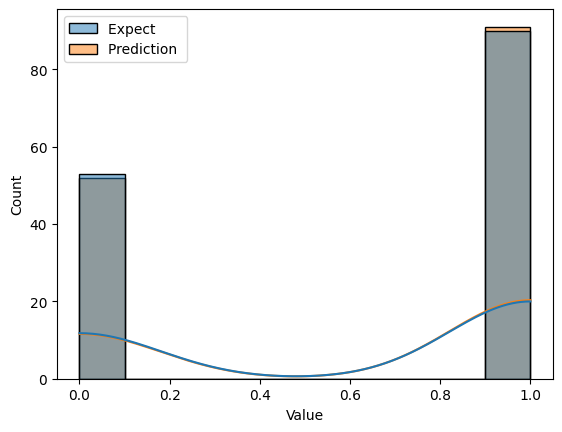

In [56]:
import seaborn as sns
df = pd.DataFrame({'Expect ': actual.flatten(), 'Prediction ': predicted.flatten()})
sns.histplot(data=df, bins=10, kde=True)
plt.xlabel('Value')
plt.ylabel('Count')

plt.show()